In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('../datas.csv', sep=',', index_col='id')

subjects = ['calculus', 'algebra', 'discrete', 'ode', 'complex', 'programming',
            'stat', 'pde', 'functional', 'variational', 'random_proc', 'numerical']
years = [13, 14, 15, 16, 17]


df['mean'] = df[subjects].mean(axis=1)

# соотношение оценок по каждому году
rating_stats_by_year = dict()

courses = {
    1: ['calculus', 'algebra', 'discrete'],
    2: ['ode', 'programming', 'complex'],
    3: ['stat', 'pde', 'functional'],
    4: ['variational', 'random_proc', 'numerical']
}
df_for_each_course = [
    df[['year', 'calculus', 'algebra', 'discrete']],
    df[['year', 'ode', 'programming', 'complex']],
    df[['year', 'stat', 'pde', 'functional']],
    df[['year', 'variational', 'random_proc', 'numerical']]
]
i = 1

for course in df_for_each_course:
    rating_stats_by_year[i] = {}

    for year in years:      
        current_course_df = course[course['year'] == year].drop(columns=['year'])
        current_course_df = current_course_df.apply(lambda x: x.value_counts())
        current_course_df = current_course_df.sum(axis=1)
        
        if not current_course_df.empty:
            current_course_df.index.astype(int)
            rating_stats_by_year[i][year+1] = current_course_df

    i += 1
    
ege_df = df[['year', 'ege']]
# баллы ЕГЭ за каждый год
ege_df_by_year = dict()

for year in years:
    year_df = ege_df[ege_df['year'] == year].drop(columns=['year'])
    ege_df_by_year["20{}".format(year)] = year_df['ege'].tolist()

# средняя оценка по потокам
mean_rating_by_flow = {}

for year in years:
    mean_rating_by_flow[int("20{}".format(year))] = (df[df['year'] == year][['mean']].sum() / 20).values[0]

### Динамика баллов ЕГЭ

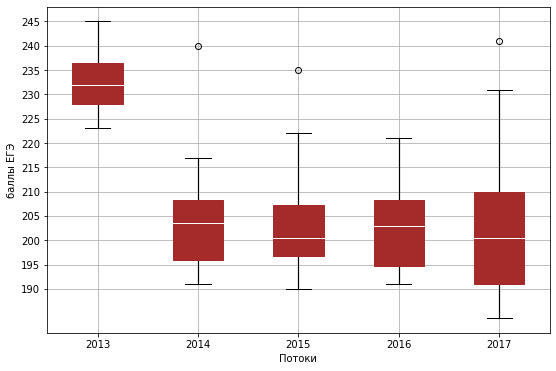

In [3]:
box_props = dict(boxes='brown', whiskers="black", medians="white", caps="black")
whiskers_props = dict(linewidth=1.2)
ege_df = pd.DataFrame.from_dict(ege_df_by_year)
ax = ege_df.plot.box(figsize=(9,6), color=box_props, patch_artist=True, whiskerprops=whiskers_props)
ax.set_ylabel('баллы ЕГЭ')
ax.set_xlabel('Потоки')
ax.grid()
ax.set_yticks(np.arange(190, 250, 5))
plt.savefig('ege.png', dpi=300);

### Средний балл по каждому потоку

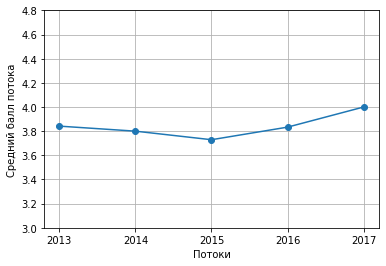

In [4]:
x = mean_rating_by_flow.keys()
y = mean_rating_by_flow.values()
plt.errorbar(x, y, marker='o')

plt.ylabel('Средний балл потока')
plt.xlabel('Потоки')

plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.yticks(np.arange(3, 5, 0.2))
plt.grid()
plt.savefig('mean_rating_by_flow.png', dpi=300);

### Самый пессимистичный прогноз для потоков 2016 и 2017 года

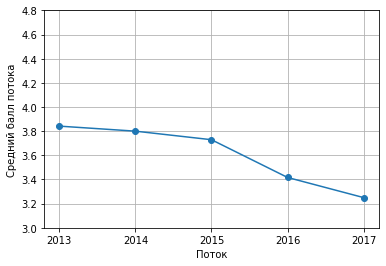

In [5]:
pessimistic_df = df.copy()
pessimistic_df.loc[pessimistic_df['year'] == 16, courses[3] + courses[4]] = 3
pessimistic_df.loc[pessimistic_df['year'] == 17, courses[2] + courses[3] + courses[4]] = 3
pessimistic_df['mean'] = pessimistic_df[subjects].mean(axis=1)

pessemistic_mean_by_flow = {
    2013: pessimistic_df.loc[pessimistic_df['year'] == 13]['mean'].mean(),
    2014: pessimistic_df.loc[pessimistic_df['year'] == 14]['mean'].mean(),
    2015: pessimistic_df.loc[pessimistic_df['year'] == 15]['mean'].mean(),
    2016: pessimistic_df.loc[pessimistic_df['year'] == 16]['mean'].mean(),
    2017: pessimistic_df.loc[pessimistic_df['year'] == 17]['mean'].mean()
}

x = pessemistic_mean_by_flow.keys()
y = pessemistic_mean_by_flow.values()
plt.errorbar(x, y, marker='o')

plt.ylabel('Средний балл потока')
plt.xlabel('Поток')

plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.yticks(np.arange(3, 5, 0.2))
plt.grid()
plt.savefig('pessemistic_mean_by_flow.png', dpi=300);

### Гистограммы баллов ЕГЭ и средних оценок

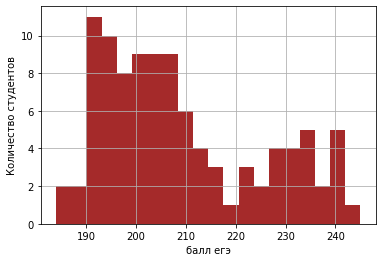

In [6]:
df['ege'].hist(color='brown', bins=20)
# df['ege'].plot.kde()
plt.ylabel('Количество студентов')
plt.xlabel('балл егэ')
plt.savefig('hist_ege.png', dpi=300);

In [33]:
df['ege'].describe()

count    100.000000
mean     209.190000
std       15.750386
min      184.000000
25%      196.750000
50%      205.000000
75%      221.250000
max      245.000000
Name: ege, dtype: float64

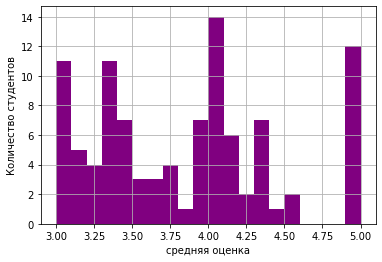

In [7]:
df['mean'].hist(color='purple', bins=20)
# df['mean'].plot.kde()
plt.ylabel('Количество студентов')
plt.xlabel('средняя оценка')
plt.savefig('hist_mean.png', dpi=300);

In [8]:
df['mean'].describe()

count    100.000000
mean       3.840833
std        0.603034
min        3.000000
25%        3.333333
50%        3.916667
75%        4.166667
max        5.000000
Name: mean, dtype: float64

### Диаграмма рассеяния 

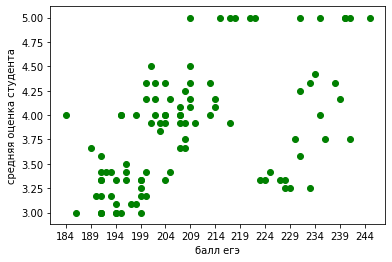

In [9]:
mean_rating = df['mean'].tolist()
ege = df['ege'].tolist()

plt.scatter(ege, mean_rating, c='green')

plt.ylabel('средняя оценка студента')
plt.xlabel('балл егэ')
plt.xticks(np.arange(min(ege), max(ege)+1, 5))
plt.savefig('scatter.png', dpi=300);

### Диаграмма рассеяния без наблюдений 2013 года

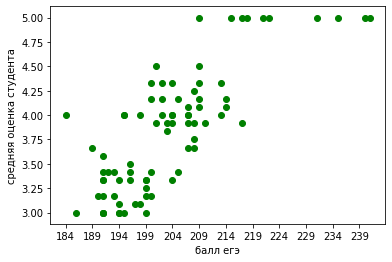

In [10]:
mean_rating = df.loc[df['year'] != 13, 'mean'].tolist()
ege = df.loc[df['year'] != 13]['ege'].tolist()

plt.scatter(ege, mean_rating, c='green')

plt.ylabel('средняя оценка студента')
plt.xlabel('балл егэ')
plt.xticks(np.arange(min(ege), max(ege)+1, 5))
plt.savefig('scatter_without_2013.png', dpi=300);

### Корреляция Спирмена

In [11]:
df['mean_rank'] = df['mean'].rank(ascending=False)
df['ege_rank'] = df['ege'].rank(ascending=False)

df.corr(method='spearman')['mean_rank']['ege_rank']

0.5678659633707841

### Корреляция Спирмена для выборки без наблюдений 2013 года

In [12]:
df['mean_rank'] = df.loc[df['year'] != 13, 'mean'].rank(ascending=False)
df['ege_rank'] = df.loc[df['year'] != 13, 'ege'].rank(ascending=False)

df.corr(method='spearman')['mean_rank']['ege_rank']

0.7603385021989282